<a href="https://colab.research.google.com/github/SiriN1234/Python_Learning_google_colab/blob/main/Chapter_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 합성곱 신경망

- 로지스틱 회귀 (일반 ML 모형) : 81% / 1950년대
- 인공신경망 (딥러닝 초기 모형) : 87% / 1940~80년대
- 합성곱(Convolution, CNN)
  + 코드보다는 주요 용어 정리에 주력
  + 발전사 : alexnet (2012) -> resnet -> efficientnet
  + 채널, 이미지의 너비, 크기 (파라미터 튜닝)
  + Vision Transformer
- 비디오
  + 객체인식(Object Detection)
  + Yolo 논문
- RNN / LSTM (자연어 처리)
  + 구글에서 2017년에 Transformer 논문 발표

# 합성곱의 장점

- 기존 : 1차원 배열에서만 연산이 가능
- 2차원 배열에도 연산을 할 수 있도록 구현
  + 선형대수를 공부해야 함


In [ ]:
from tensorflow import keras
keras.layers.Conv2D(10, kernel_size = (3, 3), activation = 'relu')

## 패딩의 목적

- 배열의 크기를 조정하더라도 이미지 원 특성이 손실되는 것을 방지하는 것

In [ ]:
keras.layers.Conv2D(10, kernel_size = (3, 3),
                    activation = 'relu',
                    padding = 'same',
                    strides = 1)

## 풀링

- 값을 추출
- 100 x 100 이미지 --> (수치로) 주요 이미지의 특성만 뽑은 후, 원 이미지와 같게 만듦 (50 x 50)

- 교재 437p
- 1단계 : 이미지 데이터 입력
- 2단계 : 합성곱 층
  + (1) kernel_size + padding
  + (2) 활성화 함수 적용
  + (3) 각각의 특성맵을 산출
- 3단계 : 풀링층
  + (1) Max Pooling : 최댓값 추출
  + (2) 최종 특성맵 만듦
- 위 과정을 계속 만복하는 것이 CNN 알고리즘

#### 알고리즘

- 4단계 : 밀집층 (Fully Connected Layer)
  + Chapter 7장에서 이미 배움
- 5단계 : 분류 예측값을 산출 (Softmax 활성화 함수)

#### 주요 키워드 : 사전학습(Pretrained) / 전이학습(Transfer Learning) / 파인 튜닝(Fine Tuning)

- 캐글 경진대회
- 클래스 공부 필수

# 키워드로 끝내는 핵심 포인트

- **합성곱**은 밀집층과 비슷하게 입력과 가중치를 곱하고 절편을 더하는 선형 계산입니다. 하지만 밀집층과 달리 각 합성곱은 입력 전체가 아니라 일부만 사용하여 선형 계산을 수행합니다.
- 합성곱 층의 **필터**는 밀집층의 뉴런에 해당합니다. 필터의 가중치와 절편을 종종 커널이라고 부릅니다. 자주 사용되는 커널의 크기는 (3, 3) 또는 (5, 5)입니다. 커널의 깊이는 입력의 깊이와 같습니다
- **특성 맵**은 합성곱 층이나 풀링 층의 출력 배열을 의미합니다. 필터 하나가 하나의 특성 맵을 만듭니다. 합성곱 층에서 5개의 필터를 적용하면 5개의 특성 맵이 만들어집니다.
- **패딩**은 합성곱 층의 입력 주위에 추가한 0으로 채워진 픽셀입니다. 패딩을 사용하지 않는 것을 밸리드 패딩이라고 합니다. 합성곱 층의 출력 크기를 입력과 동일하게 만들기 위해 입력에 패딩을 추가하는 것을 세임 패딩이라고 합니다.
- **스트라이드**는 합성곱 층에서 필터가 입력 위를 이동하는 크기입니다. 일반적으로 스트라이드는 1픽셀을 사용합니다.
- **풀링**은 가중치가 없고 특성 맵의 가로세로 크기를 줄이는 역할을 수행합니다. 대표적으로 최대 풀링과 평균 풀링이 있으며 (2, 2) 풀링으로 입력을 절반으로 줄입니다.

# 패션 MNIST 데이터 불러오기

- 데이터 스케일을 0에서 255사이 0~1로 표준화
- 훈련 데이터 / 검증 데이터 분류
- 완전 연결 신경망(Fully Connected Layer)
- -> 2차원 배열을 1차원 배열로 만들어 줘야 함 (최종 분류 값 도출)
- -> 합성곱에서는 2차원 이미지를 그대로 사용한다

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

4431872/4422102 [==============================] - 0s 0us/step


# 합성곱 신경망 만들기

In [ ]:
model = keras.Sequential()

# 합성곱 층
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu',
                              padding = 'same', input_shape = (28, 28, 1)))

# 풀링층
model.add(keras.layers.MaxPooling2D(2))

# 합성곱 층
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu',
                              padding = 'same'))

# 풀링층
model.add(keras.layers.MaxPooling2D(2))

# 완전연결층 (밀집층 = Fully Connected Layer)
# Chapter 7장 내용
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

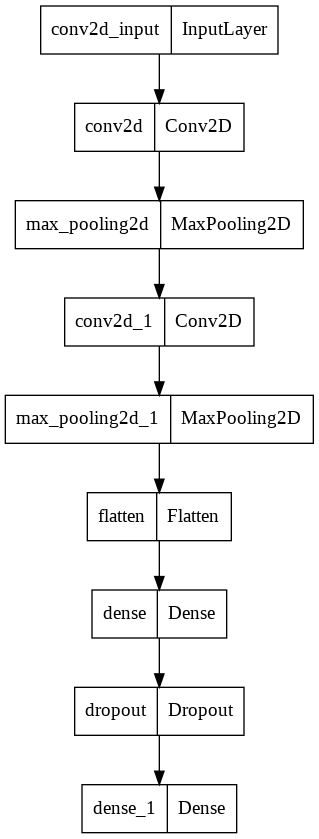

In [ ]:
keras.utils.plot_model(model)

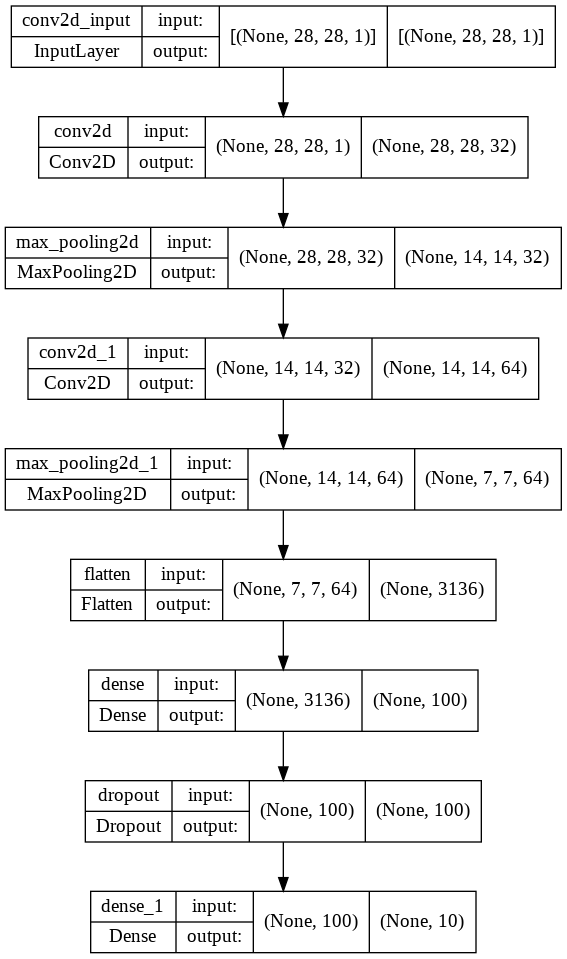

In [ ]:
keras.utils.plot_model(model, show_shapes = True)

- 지금까지 한 것은 모델 정의
- 모델 컴파일 후, 훈련

In [ ]:
import tensorflow as tf

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

with tf.device('/device:GPU:0') :
  history = model.fit(train_scaled, train_target, epochs=10,
                      validation_data=(val_scaled, val_target),
                      callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 66s 43ms/step - loss: 0.5132 - accuracy: 0.8163 - val_loss: 0.3227 - val_accuracy: 0.8805
Epoch 2/20
1500/1500 [==============================] - 64s 43ms/step - loss: 0.3438 - accuracy: 0.8779 - val_loss: 0.2842 - val_accuracy: 0.8943
Epoch 3/20
1500/1500 [==============================] - 93s 62ms/step - loss: 0.2999 - accuracy: 0.8926 - val_loss: 0.2559 - val_accuracy: 0.9061
Epoch 4/20
1500/1500 [==============================] - 64s 42ms/step - loss: 0.2655 - accuracy: 0.9027 - val_loss: 0.2403 - val_accuracy: 0.9115
Epoch 5/20
1500/1500 [==============================] - 62s 41ms/step - loss: 0.2438 - accuracy: 0.9104 - val_loss: 0.2277 - val_accuracy: 0.9158
Epoch 6/20
1500/1500 [==============================] - 62s 42ms/step - loss: 0.2243 - accuracy: 0.9173 - val_loss: 0.2249 - val_accuracy: 0.9192
Epoch 7/20
1500/1500 [==============================] - 62s 42ms/step - loss: 0.2020 - accuracy: 0.9245 - val_loss: 0.2255 -

- 모델 학습 곡선 그리기

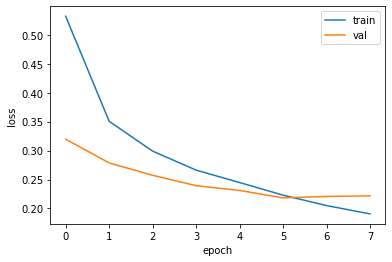

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

- google colab에서 GPU 확인

In [ ]:
import tensorflow as tf

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# 합성곱 신경망 시각화

- 교재 465p

In [ ]:
from tensorflow import keras

# 사전학습 진행
model = keras.models.load_model("best-cnn-model.h5")

# keras.utils.plot_model(model, show_shapes = True)
model.layers

- 합성곱 층의 가중치를 확인 가능

In [ ]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [ ]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.029388867 0.27234086


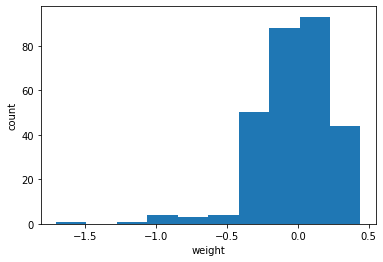

In [ ]:
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

- 교재 468p

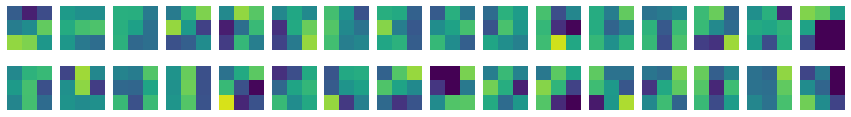

In [ ]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

In [ ]:
no_training_model = keras.Sequential()

no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', 
                                          padding='same', input_shape=(28,28,1)))

In [ ]:
no_training_conv = no_training_model.layers[0]

print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [ ]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.0010502868 0.08291164


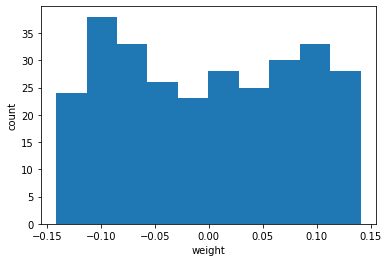

In [ ]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

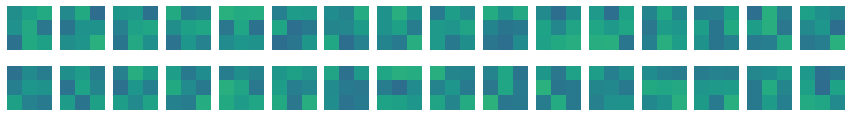

In [ ]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

# 함수형 API

- 474p

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


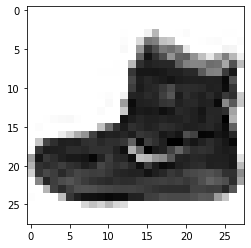

In [ ]:
print(model.input)
conv_acti = keras.Model(model.input, model.layers[0].output)
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [ ]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0
feature_maps = conv_acti.predict(inputs)
print(feature_maps.shape)

(1, 28, 28, 32)


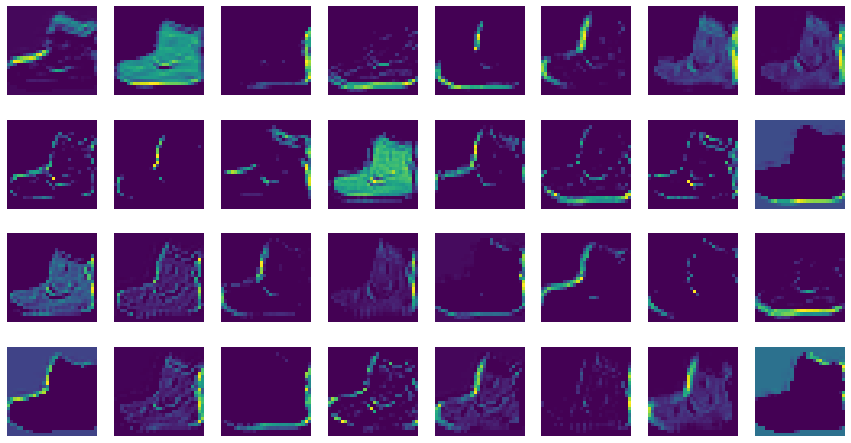

In [ ]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

(1, 14, 14, 64)


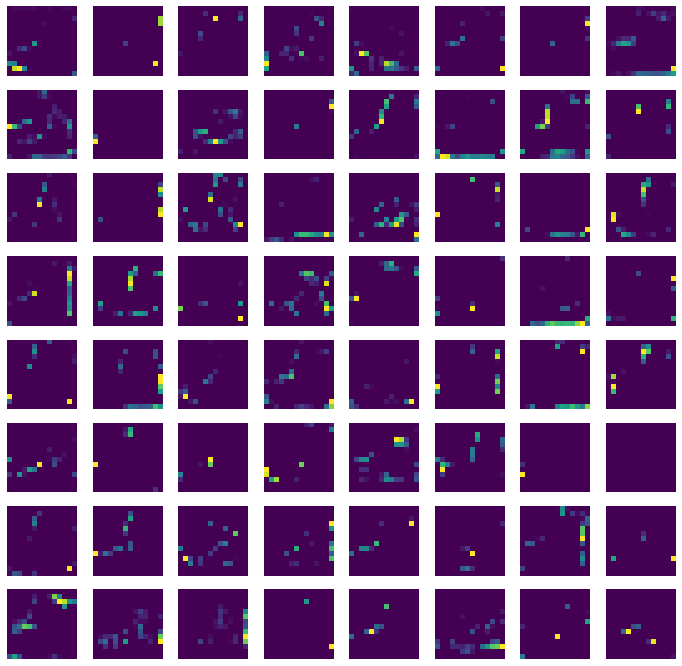

In [ ]:
conv2_acti = keras.Model(model.input, model.layers[2].output)
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/255.0)
print(feature_maps.shape)

fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()